## About Dataset: 

This data is scraped from woldometers.info on 2022-05-14. It represents 225 countries. The records are dating from 2020-2-15 until 2022-05-14.

Dataset: https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset

## Problem statement:
To perform exploratory data analysis

## Import necessary libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as po
po.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv("worldometer_coronavirus_summary_data.csv")
df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


## Exploring data

In [3]:
df.shape

(226, 12)

In [4]:
df.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.260000e+02,2.180000e+02,2.040000e+02,2.040000e+02,145.000000,226.000000,218.000000,2.120000e+02,2.120000e+02,2.260000e+02
mean,2.305651e+06,2.884442e+04,2.256851e+06,6.861029e+04,269.482759,148156.809735,1157.550459,2.987445e+07,1.944650e+06,3.495521e+07
std,7.575510e+06,9.971254e+04,7.613357e+06,2.350430e+05,883.174727,155202.909225,1212.833590,1.079635e+08,3.318400e+06,1.390338e+08
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.093000e+03,8.050000e+02
25%,2.412600e+04,2.370000e+02,1.619300e+04,2.397500e+02,5.000000,11748.250000,172.500000,3.472968e+05,1.667260e+05,5.605125e+05
50%,1.793750e+05,2.251500e+03,1.372740e+05,1.634000e+03,17.000000,98271.500000,768.000000,2.238918e+06,7.753355e+05,5.800570e+06
75%,1.090902e+06,1.400650e+04,1.006245e+06,1.929675e+04,139.000000,255632.750000,1850.000000,1.233862e+07,2.267408e+06,2.187284e+07
max,8.420947e+07,1.026646e+06,8.124426e+07,1.938567e+06,8318.000000,704302.000000,6297.000000,1.016883e+09,2.184247e+07,1.439324e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    218 non-null    float64
 4   total_recovered                 204 non-null    float64
 5   active_cases                    204 non-null    float64
 6   serious_or_critical             145 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  218 non-null    float64
 9   total_tests                     212 non-null    float64
 10  total_tests_per_1m_population   212 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [6]:
df.isnull().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Observation:

* There are 226 rows and 12 column in the dataset.
* Except first two columns, all other columns are categorical.
* There are no duplicates.
* There are some missing values in the data. As the population of countries differ, replacing missing values by mean or median would distort the actual picture. Hence I am keeping them as it is.

In [8]:
df.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')

#### Columns Description:
* country: name of country
* continent: name of continent where country is located
* total_confirmed: total number of confirmed cases in the country
* total_deaths: total number of deaths in the country
* total_recovered: total number of recoveries in the country
* active_cases: number of active cases in the country
* serious_or_critical: estimated number of cases in serious or critical conditions
* total_cases_per_1m_population: number of total cases per 1 million population in the country
* total_deaths_per_1m_population: number of total deaths per 1 million population in the country
* total_tests: number of total tests done in the country
* total_tests_per_1m_population: number of total test done per 1 million population in the country
* population: population of the country

## Changing names of columns

As the names of columns are quite large, I am changing their names.

In [9]:
df.columns = ['country', 'continent', 'confirmed_cases', 'deaths','recovered', 'active', 'serious',
              'cases/million', 'deaths/million','total_tests', 'tests/million', 'population']
df.head(2)

,country,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945


Now its time to start EDA. I will analyse the data based on continents first and then by country.

## Part A: Continent-wise Analysis

In [10]:
# Data grouped by continent
df_continent = df.groupby('continent').sum().reset_index()
df_continent

,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population
0,Africa,12042400,254319.0,10137200.0,497766.0,966.0,1894093,17982.0,1.021264e+08,10540422.0,1400358940
1,Asia,149999659,1427939.0,126145273.0,3260318.0,11768.0,5316204,31429.0,2.117785e+09,81570774.0,4672455975
2,Australia/Oceania,7942867,11413.0,7403813.0,455469.0,162.0,1862950,6467.0,7.960052e+07,15975715.0,43505620
3,Europe,194330079,1830655.0,170861871.0,5841832.0,8050.0,15377171,113334.0,2.675603e+09,201007918.0,748470690
4,North America,99625662,1467234.0,94818163.0,3329149.0,7460.0,7011745,51579.0,1.137409e+09,90468341.0,597707388
5,South America,57136485,1296523.0,51031313.0,611966.0,10669.0,2021276,31555.0,2.208589e+08,12702585.0,437379735


### 1. Comparison between Total confirmed cases & Population

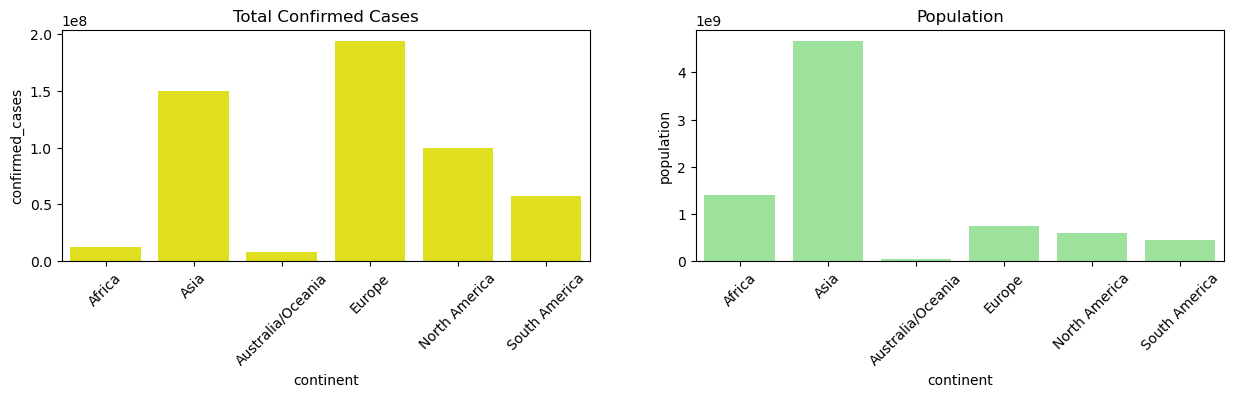

In [11]:
plt.figure(figsize=(15,3))

#total cases
plt.subplot(1,2,1)
sns.barplot('continent','confirmed_cases', data = df_continent, errwidth=0, color = 'yellow')
plt.xticks(rotation=45)
plt.title("Total Confirmed Cases")

#total population
plt.subplot(1,2,2)
sns.barplot('continent','population', data = df_continent, errwidth=0, color = 'lightgreen')
plt.xticks(rotation=45)
plt.title("Population")

plt.show()

Though Asia continent has maximum population, the highest number of covid-19 cases are found in Europe.

### 2. Prevalence rate

Prevalence is defined as the proportion of population who has disease at one time point. It is calulated by dividing total number of confirmed cases by population at risk. In following graph I will plot prevalence rate along with poulation for better comparison.

In [12]:
#finding prevalence rate for each continent
prevalence_rate = []

for i in range(df_continent.shape[0]):
    p = round((df_continent['confirmed_cases'][i]/df_continent['population'][i])*100,2)
    prevalence_rate.append(p)
    
print('prevalence_rate: ', prevalence_rate)

#adding this as new column in continent wise data
df_continent['prevalence_rate'] = prevalence_rate
df_continent

prevalence_rate:  [0.86, 3.21, 18.26, 25.96, 16.67, 13.06]


,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rate
0,Africa,12042400,254319.0,10137200.0,497766.0,966.0,1894093,17982.0,1.021264e+08,10540422.0,1400358940,0.86
1,Asia,149999659,1427939.0,126145273.0,3260318.0,11768.0,5316204,31429.0,2.117785e+09,81570774.0,4672455975,3.21
2,Australia/Oceania,7942867,11413.0,7403813.0,455469.0,162.0,1862950,6467.0,7.960052e+07,15975715.0,43505620,18.26
3,Europe,194330079,1830655.0,170861871.0,5841832.0,8050.0,15377171,113334.0,2.675603e+09,201007918.0,748470690,25.96
4,North America,99625662,1467234.0,94818163.0,3329149.0,7460.0,7011745,51579.0,1.137409e+09,90468341.0,597707388,16.67
5,South America,57136485,1296523.0,51031313.0,611966.0,10669.0,2021276,31555.0,2.208589e+08,12702585.0,437379735,13.06


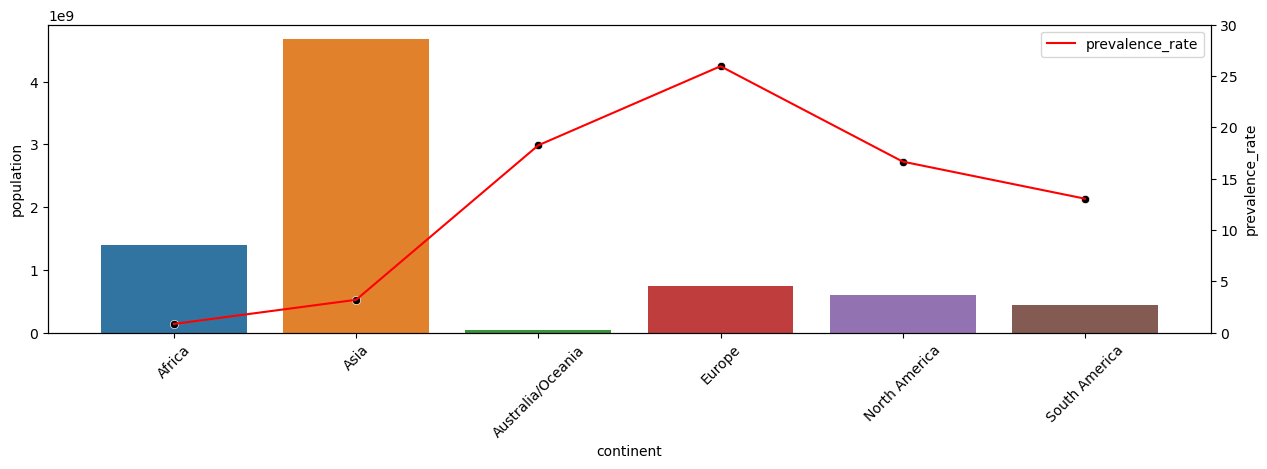

In [13]:
#population and prevalence
plt.figure(figsize=(15,4))

#left axis for population
axis1 = sns.barplot('continent','population', data = df_continent)
plt.xticks(rotation=45)

#generate second axis
axis2 = axis1.twinx()

#right axis for prevalence rate
sns.lineplot('continent', 'prevalence_rate', data = df_continent, label = 'prevalence_rate', color = 'red', ax = axis2)
sns.scatterplot('continent', 'prevalence_rate', data = df_continent, color = 'black', ax = axis2 )
axis2.legend(loc = 'upper right')
axis2.set_ylim(0,30)

plt.show()

The prevalence of COVID-19 cases is the highest in Europe at 25% while it is lowest in Africa at around 1%. It means 25% of European population has had the disease at one time point. On the other hand, the African continent has only 1% of its population diagnosed with the disease.

### 3. Recovery Rate

It gives the number of total cases who has been recovered from the disease. It is calculated by dividing the number of recovered peaple by total confirmed cases. 

In [14]:
#Finding recovery rate
recovery_rate = []

for i in range(df_continent.shape[0]):
    r = round((df_continent['recovered'][i]/df_continent['confirmed_cases'][i])*100,2)  
    recovery_rate.append(r)
    
print('recovery_rate: ', recovery_rate)

#adding this as new column in continent wise data
df_continent['recovery_rate'] = recovery_rate
df_continent

recovery_rate:  [84.18, 84.1, 93.21, 87.92, 95.17, 89.31]


,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rate,recovery_rate
0,Africa,12042400,254319.0,10137200.0,497766.0,966.0,1894093,17982.0,1.021264e+08,10540422.0,1400358940,0.86,84.18
1,Asia,149999659,1427939.0,126145273.0,3260318.0,11768.0,5316204,31429.0,2.117785e+09,81570774.0,4672455975,3.21,84.10
2,Australia/Oceania,7942867,11413.0,7403813.0,455469.0,162.0,1862950,6467.0,7.960052e+07,15975715.0,43505620,18.26,93.21
3,Europe,194330079,1830655.0,170861871.0,5841832.0,8050.0,15377171,113334.0,2.675603e+09,201007918.0,748470690,25.96,87.92
4,North America,99625662,1467234.0,94818163.0,3329149.0,7460.0,7011745,51579.0,1.137409e+09,90468341.0,597707388,16.67,95.17
5,South America,57136485,1296523.0,51031313.0,611966.0,10669.0,2021276,31555.0,2.208589e+08,12702585.0,437379735,13.06,89.31


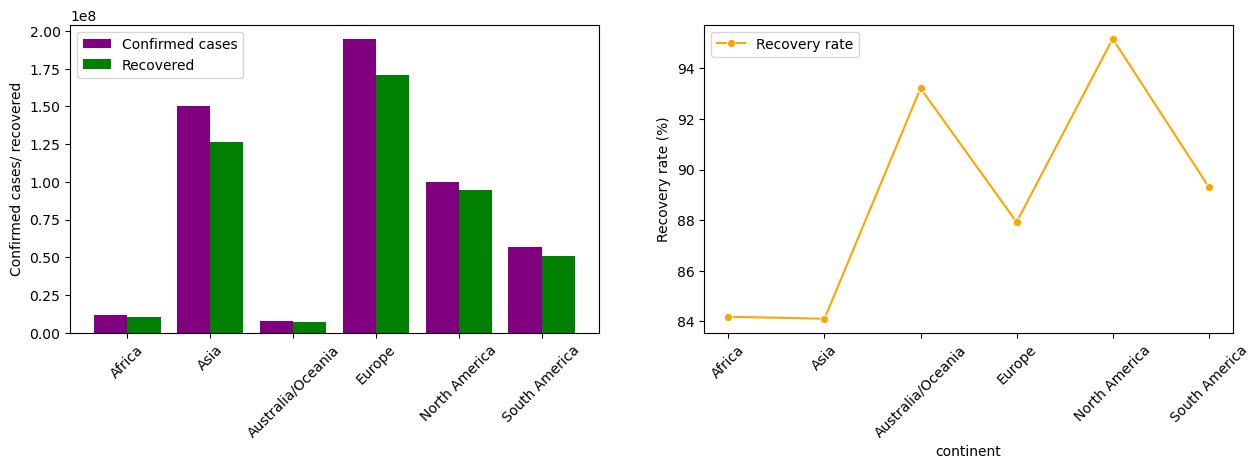

In [15]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
x = np.arange(df_continent.shape[0])
plt.bar(x-0.2, 'confirmed_cases', data = df_continent, label = 'Confirmed cases', color = 'purple', width = 0.4)
plt.bar(x+0.2, 'recovered', data = df_continent, label = 'Recovered', color = 'green', width = 0.4)
plt.ylabel('Confirmed cases/ recovered')
plt.xticks(x, df_continent['continent'], rotation=45)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
sns.lineplot('continent', 'recovery_rate', data = df_continent, marker = 'o', label = 'Recovery rate', color = 'orange')
plt.ylabel('Recovery rate (%)')
plt.xticks(rotation=45)

plt.show()

The graph on left shows the comparison between recovered cases and the total confirmed cases. While the graph on right shows the recovery rate for each continent in percent. The recovery rate is highest in North America (95%) and lowest in Asia (84%). Though Europe has maximum cases of covid-19, the recovery rate is quite low around 88%. It indicates Europe has highest disease burden.

## 4. Death Rate

It gives the proportion of deaths out of total cases. It is calculated by dividing the number of deaths by total confirmed cases.

In [16]:
#Finding death rate
death_rate = []

for i in range(df_continent.shape[0]):
    d = round((df_continent['deaths'][i]/df_continent['confirmed_cases'][i])*100,2) 
    death_rate.append(d)
    
print('death_rate: ', death_rate)

#adding this as new column in continent wise data
df_continent['death_rate'] = death_rate
df_continent

death_rate:  [2.11, 0.95, 0.14, 0.94, 1.47, 2.27]


,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rate,recovery_rate,death_rate
0,Africa,12042400,254319.0,10137200.0,497766.0,966.0,1894093,17982.0,1.021264e+08,10540422.0,1400358940,0.86,84.18,2.11
1,Asia,149999659,1427939.0,126145273.0,3260318.0,11768.0,5316204,31429.0,2.117785e+09,81570774.0,4672455975,3.21,84.10,0.95
2,Australia/Oceania,7942867,11413.0,7403813.0,455469.0,162.0,1862950,6467.0,7.960052e+07,15975715.0,43505620,18.26,93.21,0.14
3,Europe,194330079,1830655.0,170861871.0,5841832.0,8050.0,15377171,113334.0,2.675603e+09,201007918.0,748470690,25.96,87.92,0.94
4,North America,99625662,1467234.0,94818163.0,3329149.0,7460.0,7011745,51579.0,1.137409e+09,90468341.0,597707388,16.67,95.17,1.47
5,South America,57136485,1296523.0,51031313.0,611966.0,10669.0,2021276,31555.0,2.208589e+08,12702585.0,437379735,13.06,89.31,2.27


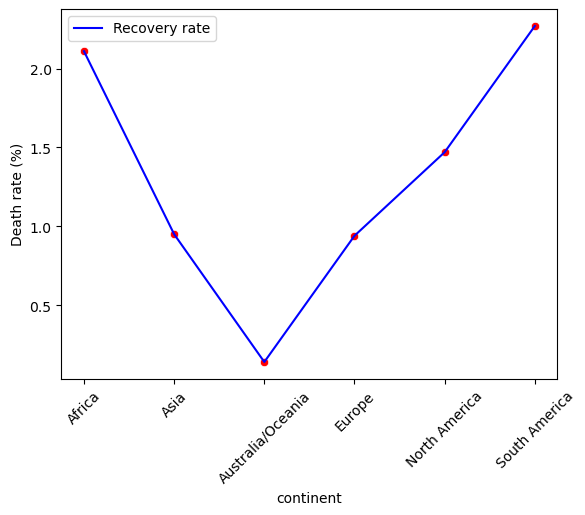

In [17]:
sns.lineplot('continent', 'death_rate', data = df_continent, label = 'Recovery rate', color = 'blue')
sns.scatterplot('continent', 'death_rate', data = df_continent, color = 'red')
plt.ylabel('Death rate (%)')
plt.xticks(rotation=45)
plt.show()

The death rate is lowest in Australia/Oceania and highest in South America.

### 5. Comparison between active cases and serious cases

I will find the percentage of people who are serious/critical by dividing the number of serious people by active cases and multiply it by 100. It will be helpful to compare the proportion of serious patients.

In [18]:
#finding percentage of serious patients out of total active cases 
serious_rate = []

for i in range(df_continent.shape[0]):
    s = round((df_continent['serious'][i]/df_continent['active'][i])*100,2) 
    serious_rate.append(s)

#adding new column to dataset
df_continent['serious_rate'] = serious_rate
df_continent

,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rate,recovery_rate,death_rate,serious_rate
0,Africa,12042400,254319.0,10137200.0,497766.0,966.0,1894093,17982.0,1.021264e+08,10540422.0,1400358940,0.86,84.18,2.11,0.19
1,Asia,149999659,1427939.0,126145273.0,3260318.0,11768.0,5316204,31429.0,2.117785e+09,81570774.0,4672455975,3.21,84.10,0.95,0.36
2,Australia/Oceania,7942867,11413.0,7403813.0,455469.0,162.0,1862950,6467.0,7.960052e+07,15975715.0,43505620,18.26,93.21,0.14,0.04
3,Europe,194330079,1830655.0,170861871.0,5841832.0,8050.0,15377171,113334.0,2.675603e+09,201007918.0,748470690,25.96,87.92,0.94,0.14
4,North America,99625662,1467234.0,94818163.0,3329149.0,7460.0,7011745,51579.0,1.137409e+09,90468341.0,597707388,16.67,95.17,1.47,0.22
5,South America,57136485,1296523.0,51031313.0,611966.0,10669.0,2021276,31555.0,2.208589e+08,12702585.0,437379735,13.06,89.31,2.27,1.74


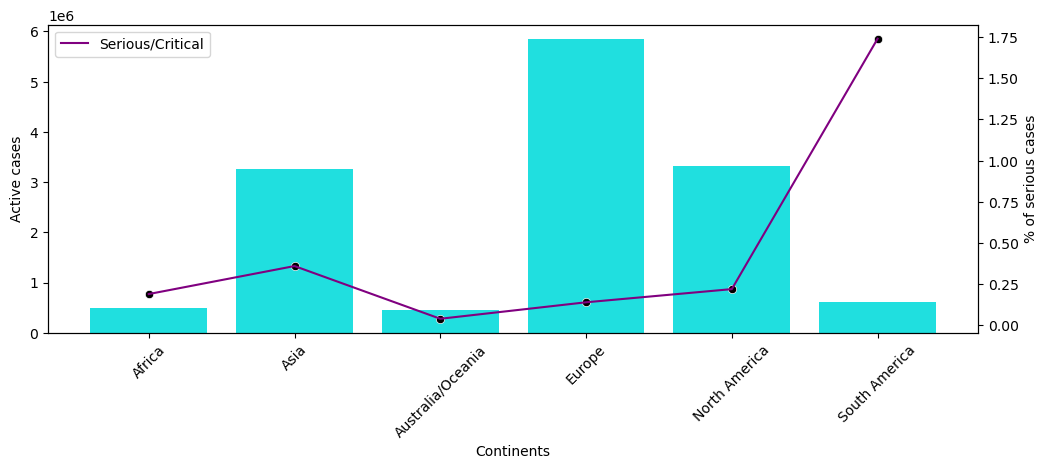

In [19]:
plt.figure(figsize=(12,4))

#active cases on left axis
axis1 = sns.barplot('continent', 'active', data=df_continent, label = 'Active cases', color='cyan')
plt.xlabel('Continents')
plt.ylabel('Active cases')
plt.xticks(rotation=45)

#generate second axis
axis2 = axis1.twinx()

#plotting percentage of serious patients on right axis
sns.lineplot('continent', 'serious_rate', data = df_continent, label = 'Serious/Critical', color='purple', ax = axis2)
sns.scatterplot('continent', 'serious_rate', data = df_continent, color='black', ax = axis2)
plt.xlabel('Continents')
plt.ylabel('% of serious cases')
plt.legend(loc = 'upper left')
plt.xticks(rotation=45)

plt.show()

The number of active cases is highest in Europe. It is quite obvious since Europe has maximum disease burden. Above graph shows that,  in Europe, the percent of serious patients are quite low and most of the cases are mild. On the other hand, South America has low active cases but the percent of serious patients is the highest amongst all the continents. 

### 6. Comparing cases/million, deaths/million and tests/million

As each continent has different population, it is difficult to compare the actual spread of disease in the continents. Here, the per million metric is helpful to bring each country on same scale. 

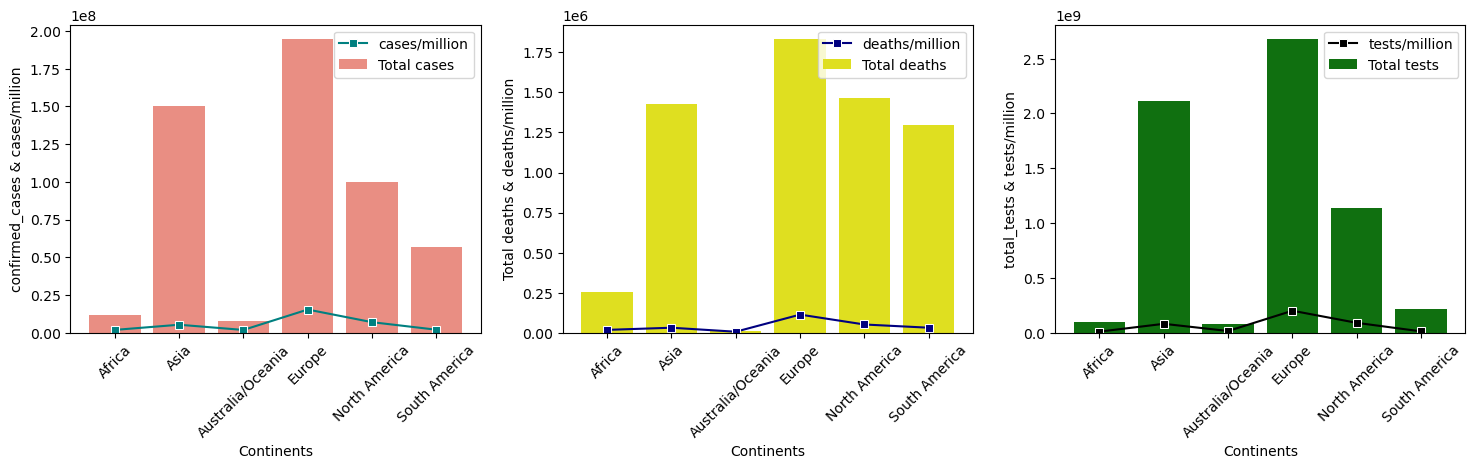

In [20]:
plt.figure(figsize=(18,4))

#cases/million
plt.subplot(1,3,1)
sns.barplot('continent', 'confirmed_cases', data = df_continent, label = 'Total cases', color='salmon')
sns.lineplot('continent', 'cases/million', data = df_continent, marker = 's', label = 'cases/million', color='teal')
plt.xlabel('Continents')
plt.ylabel('confirmed_cases & cases/million')
plt.legend(loc = 'upper right')
plt.xticks(rotation=45)

#deaths/million
plt.subplot(1,3,2)
sns.barplot('continent', 'deaths', data = df_continent, label = 'Total deaths', color='yellow')
sns.lineplot('continent', 'deaths/million', data = df_continent, marker = 's', label = 'deaths/million', color='navy')
plt.xlabel('Continents')
plt.ylabel('Total deaths & deaths/million')
plt.legend(loc = 'upper right')
plt.xticks(rotation=45)

#tests/million
plt.subplot(1,3,3)
sns.barplot('continent', 'total_tests', data = df_continent, label = 'Total tests', color='green')
sns.lineplot('continent', 'tests/million', data = df_continent, marker = 's', label = 'tests/million', color='black')
plt.xlabel('Continents')
plt.ylabel('total_tests & tests/million')
plt.legend(loc = 'upper right')
plt.xticks(rotation=45)

plt.show()

* First graph shows that, the total confirmed cases as well as cases per million population are highest in Europe. Despite of high population in Asia, the cases per million are low. It shows large population is still untouched by covid-19. 
* Second graph also shows the same picture. Europe has the highest number of fatalities.
* Third graph shows that the Europe has conducted maximum tests per million population. Asia is having low tests count despite of high population. On the other hand, North America carried out more tests per million population than Asia, though has lower cases than the later.

## Part B: Country-wise Analysis

In [21]:
#review data
df.head()

,country,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


### 1. Comparing total confirmed cases

In [38]:
import plotly.express as px
fig = px.choropleth(df, locationmode='country names', locations = 'country', 
                    color = 'confirmed_cases', color_continuous_scale='rainbow')
fig.show()


The above choropleth map shows that maximum cases are found in the USA followed by India.

### 2. Top 50 countries by population

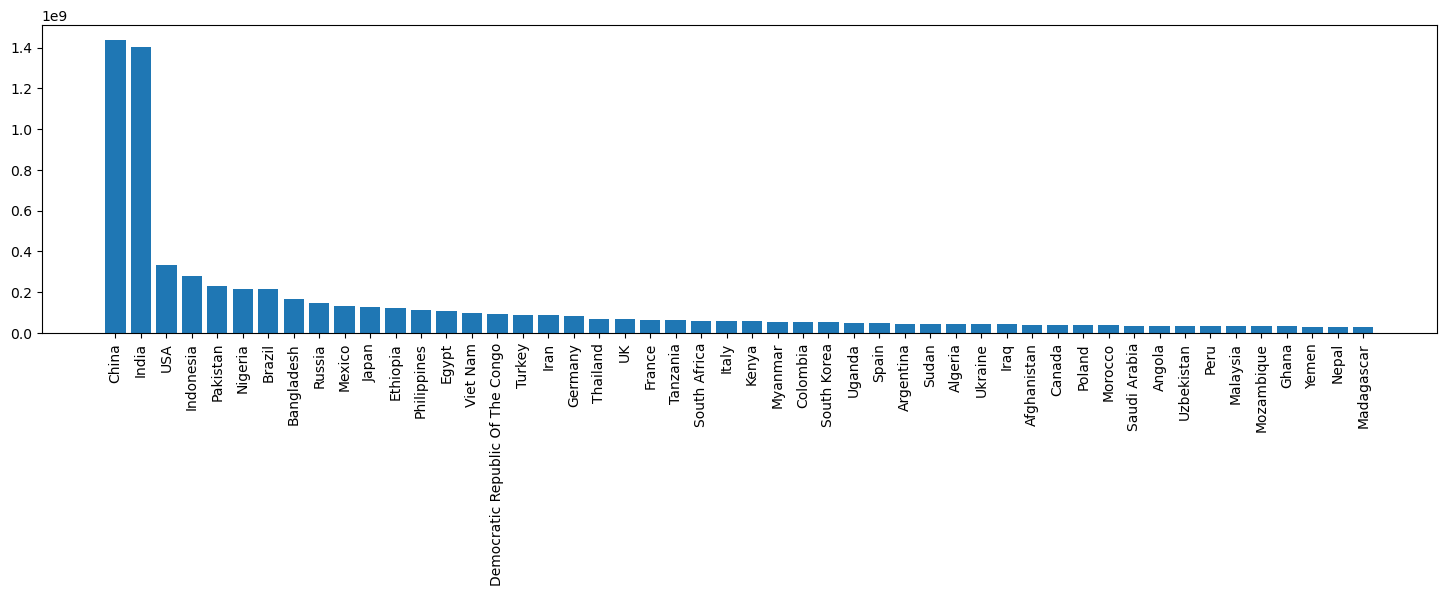

In [23]:
#arrange countries based on population
df_country = df[['country', 'population']].sort_values(by='population', ascending=False)

#barplot of top 50 countries
plt.figure(figsize=(18,4))
plt.bar(df_country['country'][0:50], df_country['population'][0:50])
plt.xticks(rotation=90)
plt.show()

China has the maximum population but still its total case count is low. India and USA are at the second and third position based on population, but they have maximum cases of covid-19.

### 3. Prevalence Rate

In [24]:
#finding prevalence rate for each country
prevalence_rates = []

for i in range(df.shape[0]):
    pr = round((df['confirmed_cases'][i]/df['population'][i])*100,2)
    prevalence_rates.append(pr)
    
#adding this as new column in continent wise data
df['prevalence_rates'] = prevalence_rates
df.head(2)

,country,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rates
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,0.44
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,9.60


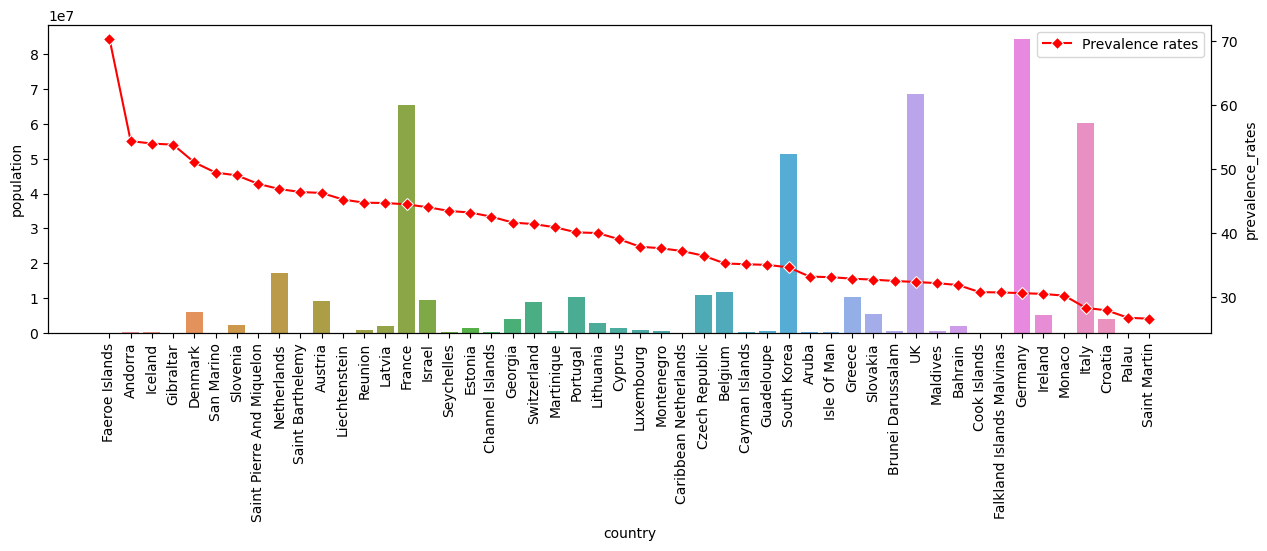

In [25]:
#population and prevalence
plt.figure(figsize=(15,4))

#top 50 countries where prevalence is high
df_country = df[['country', 'population', 'prevalence_rates']].sort_values(by='prevalence_rates', ascending=False)

#left axis for population
axis1 = sns.barplot(df_country['country'][0:50],df_country['population'][0:50])
plt.xticks(rotation=90)

#generate second axis
axis2 = axis1.twinx()

#right axis for prevalence rate
sns.lineplot(df_country['country'][0:50], df_country['prevalence_rates'][0:50],marker = 'D', color = 'red', ax = axis2)
axis2.legend(['Prevalence rates'], loc = 'upper right')

plt.show()

Faeroe Islands has the highest prevalence rate. Almost 70% of its population has had covid-19.

### 4. Recovery rate

In [26]:
#Finding recovery rate
recovery_rates = []

for i in range(df.shape[0]):
    rec = round((df['recovered'][i]/df['confirmed_cases'][i])*100,2)  
    recovery_rates.append(rec)
    
#adding this as new column in continent wise data
df['recovery_rates'] = recovery_rates
df.head(2)

,country,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rates,recovery_rates
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,0.44,90.48
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,9.60,98.64


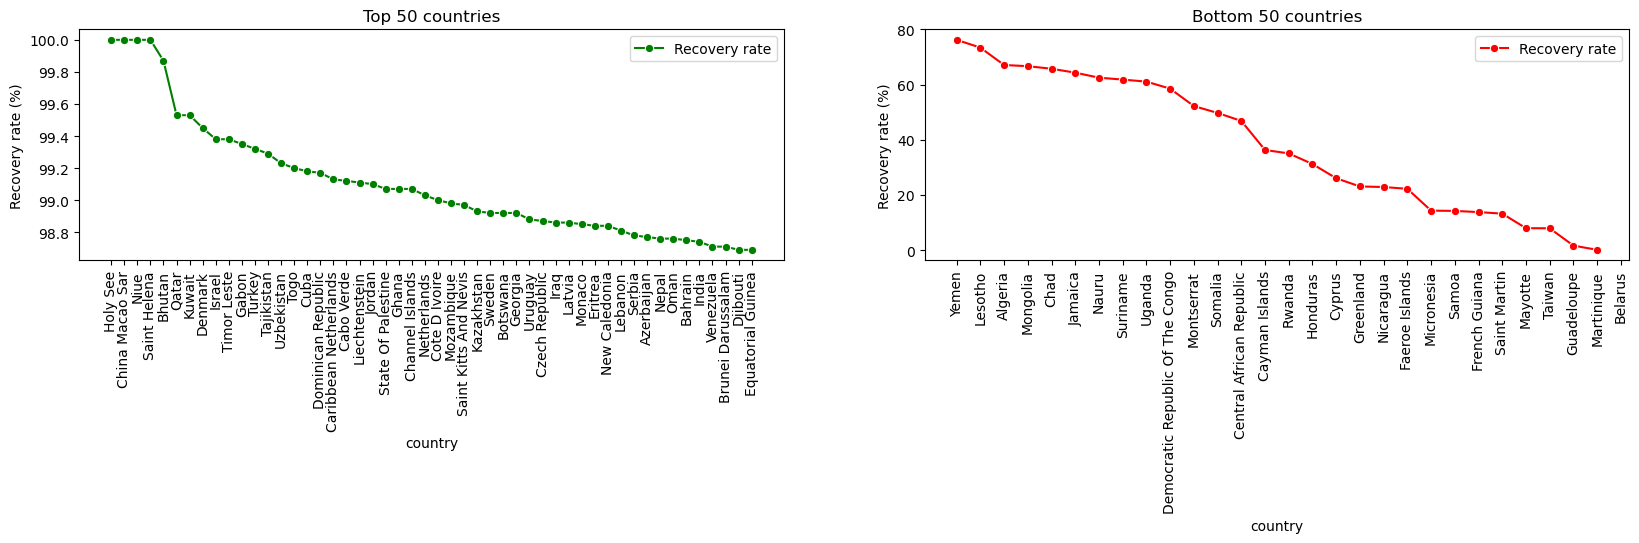

In [27]:
plt.figure(figsize=(20,3))

#arranging countries based on recovery rate
df_country = df[['country', 'recovery_rates']].sort_values(by='recovery_rates', ascending=False)

#top 50 countries with highest recovery rate
plt.subplot(1,2,1)
sns.lineplot(df_country['country'][0:50], df_country['recovery_rates'][0:50], marker = 'o', 
             label = 'Recovery rate', color = 'green')
plt.ylabel('Recovery rate (%)')
plt.xticks(rotation=90)
plt.title('Top 50 countries')

#Bottom 50 countries with lowest recovery rate
plt.subplot(1,2,2)
sns.lineplot(df_country['country'][-50:], df_country['recovery_rates'][-50:], 
             marker = 'o', label = 'Recovery rate', color = 'red')
plt.ylabel('Recovery rate (%)')
plt.xticks(rotation=90)
plt.title('Bottom 50 countries')

plt.show()

Holy See, China Macao Sar, Niue and Saint Helena have 100% recovery rate while Martinique is having lowest recovery rate.

### 5. Death rate

In [28]:
#Finding death rate
death_rates = []

for i in range(df.shape[0]):
    de = round((df['deaths'][i]/df['confirmed_cases'][i])*100,2) 
    death_rates.append(de)

#adding this as new column 
df['death_rates'] = death_rates
df.head(2)

,country,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rates,recovery_rates,death_rates
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,0.44,90.48,4.29
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,9.60,98.64,1.27


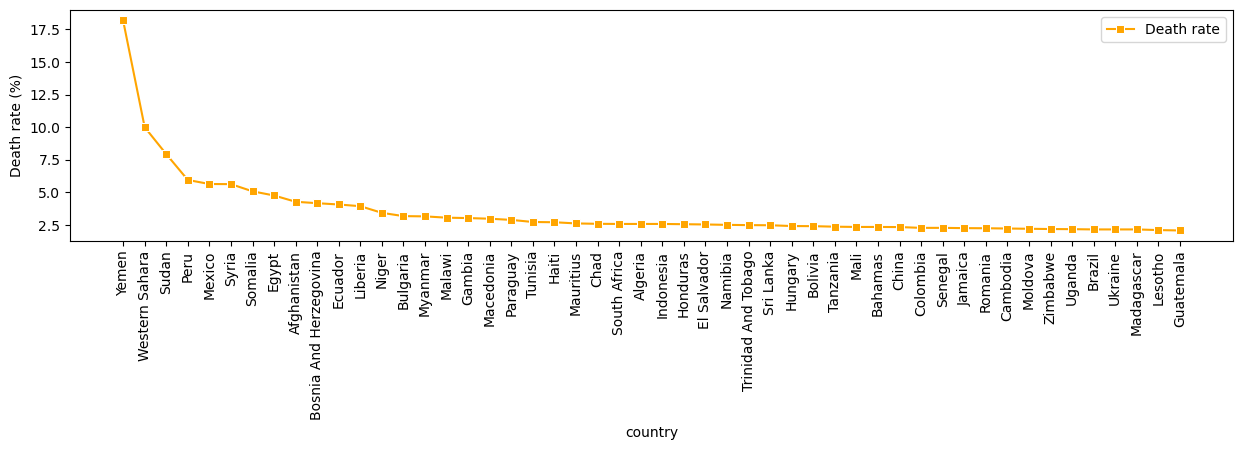

In [29]:
#arranging countries based on death rate
df_country = df[['country', 'death_rates']].sort_values(by='death_rates', ascending=False)

#top 50 countries with highest death rate
plt.figure(figsize=(15,3))
sns.lineplot(df_country['country'][0:50],df_country['death_rates'][0:50], marker = 's', label = 'Death rate', color = 'orange')
plt.ylabel('Death rate (%)')
plt.xticks(rotation=90)
plt.show()

Yemen, Westen Sahara and Sudan have high death rates.

### 6. Comparison between active cases and serious cases

In [30]:
#finding percentage of serious patients out of total active cases 
serious_rates = []

for i in range(df.shape[0]):
    se = round((df['serious'][i]/df['active'][i])*100,2) 
    serious_rates.append(se)

#adding new column to dataset
df['serious_rates'] = serious_rates
df.head(2)

,country,continent,confirmed_cases,deaths,recovered,active,serious,cases/million,deaths/million,total_tests,tests/million,population,prevalence_rates,recovery_rates,death_rates,serious_rates
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636,0.44,90.48,4.29,11.99
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945,9.60,98.64,1.27,0.80


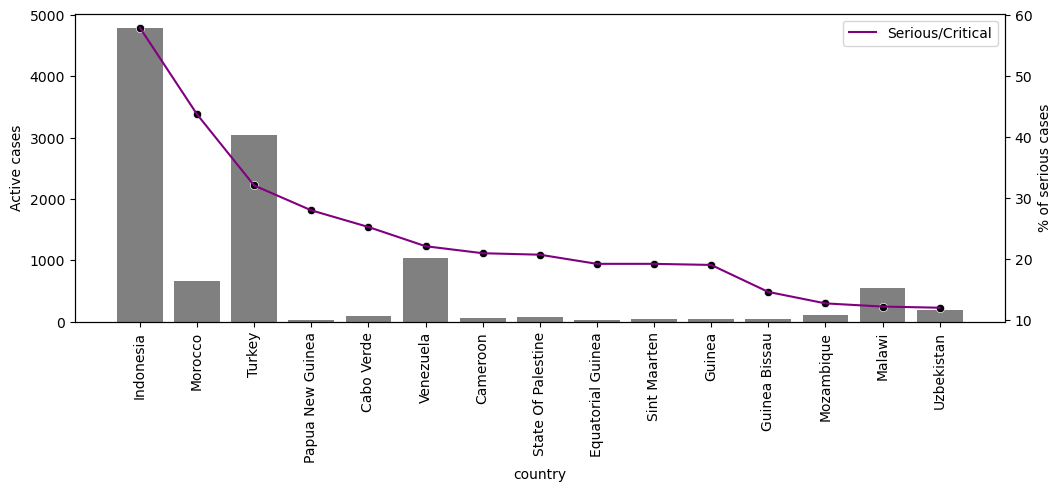

In [31]:
#arranging countries based on death rate
df_country = df[['country', 'active', 'serious_rates']].sort_values(by='serious_rates', ascending=False)

#plotting top 15 countries with highest number of active cases
plt.figure(figsize=(12,4))

#plotting active cases on left axis
axis1 = sns.barplot(df_country['country'][0:15], df_country['active'][0:15], label = 'Active cases', color='gray')
plt.ylabel('Active cases')
plt.xticks(rotation=90)

#generate second axis
axis2 = axis1.twinx()

#plotting percentage of serious patients on right axis
sns.lineplot(df_country['country'][0:15], df_country['serious_rates'][0:15], 
             label = 'Serious/Critical', color='purple', ax = axis2)
sns.scatterplot(df_country['country'][0:15], df_country['serious_rates'][0:15], color='black', ax = axis2)
plt.ylabel('% of serious cases')
plt.legend(loc = 'upper right')
plt.xticks(rotation=90)

plt.show()

Indonesia has highest number of active cases and more than 50% of it are serious or critical.

### 7. Comparing cases/million, deaths/million and tests/million

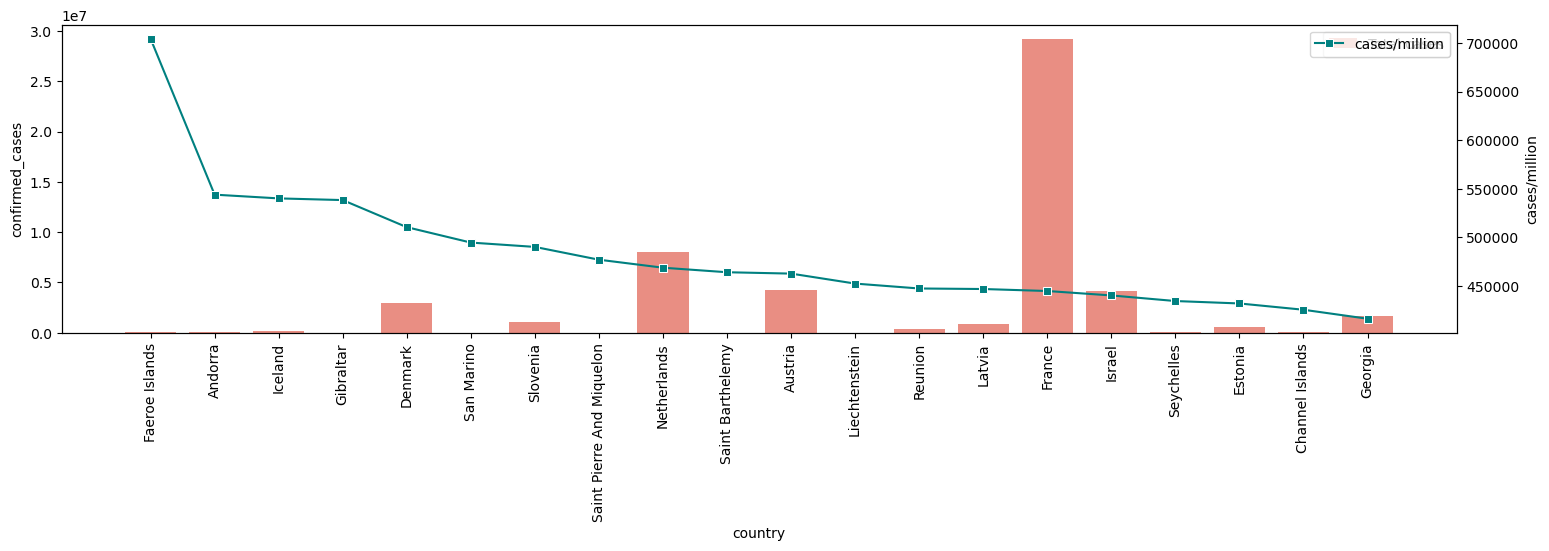

In [32]:
#cases/million

#arranging countries based on cases/million
df_country = df[['country', 'confirmed_cases', 'cases/million']].sort_values(by='cases/million', ascending=False)

#plotting top 20 countries based on cases/million
plt.figure(figsize=(18,4))

#left axis for cases
axis1 = sns.barplot(df_country['country'][0:20], df_country['confirmed_cases'][0:20], label = 'Total cases', color='salmon')
plt.ylabel('confirmed_cases')
plt.legend(loc = 'upper right')
plt.xticks(rotation=90)

#generate second axis
axis2=axis1.twinx()

#right axis for case/million
sns.lineplot(df_country['country'][0:20],df_country['cases/million'][0:20],marker='s',label ='cases/million',color='teal', ax=axis2)
plt.ylabel('cases/million')
plt.legend(loc = 'upper right')

plt.show()

Faeroe Islands has highest cases per million population.

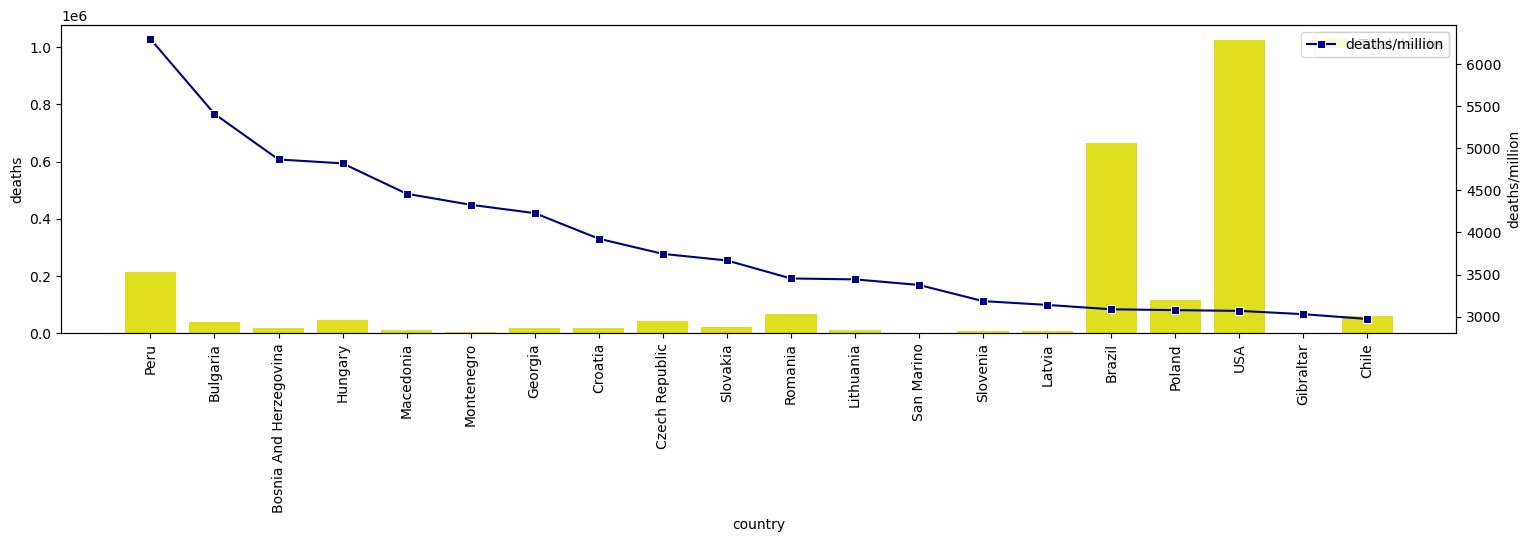

In [33]:
#deaths/million

#arranging countries based on deaths/million
df_country = df[['country', 'deaths', 'deaths/million']].sort_values(by='deaths/million', ascending=False)

#plotting top 20 countries based on cases/million
plt.figure(figsize=(18,4))

#left axis for deaths
axis1 = sns.barplot(df_country['country'][0:20], df_country['deaths'][0:20], label = 'Total deaths', color='yellow')
plt.ylabel('deaths')
plt.legend(loc = 'upper right')
plt.xticks(rotation=90)

#generate second axis
axis2=axis1.twinx()

#right axis for deaths/million
sns.lineplot(df_country['country'][0:20],df_country['deaths/million'][0:20],
             marker= 's',label ='deaths/million',color='navy',ax=axis2)
plt.ylabel('deaths/million')
plt.legend(loc = 'upper right')

plt.show()

Peru has the highest deaths per million population.

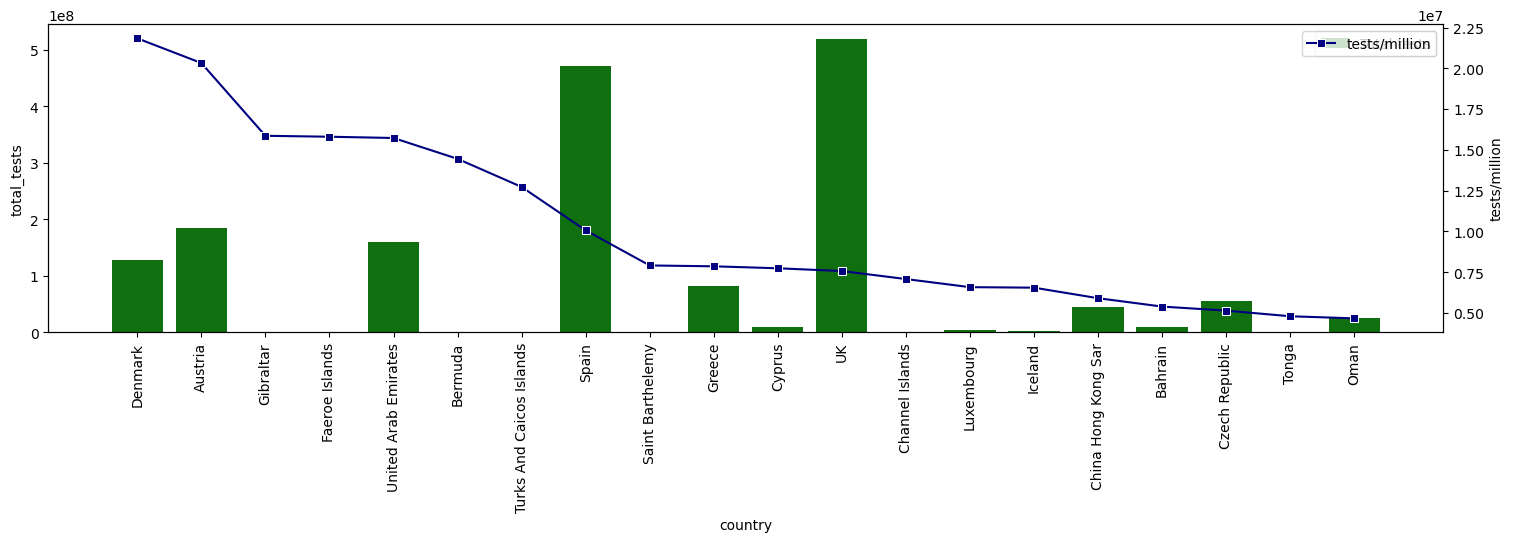

In [34]:
#deaths/million

#arranging countries based on tests/million
df_country = df[['country', 'total_tests', 'tests/million']].sort_values(by='tests/million', ascending=False)

#plotting top 20 countries based on tests/million
plt.figure(figsize=(18,4))

#left axis for deaths
axis1 = sns.barplot(df_country['country'][0:20], df_country['total_tests'][0:20], label = 'Total tests', color='green')
plt.ylabel('total_tests')
plt.legend(loc = 'upper right')
plt.xticks(rotation=90)

#generate second axis
axis2=axis1.twinx()

#right axis for deaths/million
sns.lineplot(df_country['country'][0:20],df_country['tests/million'][0:20],
             marker= 's',label ='tests/million', color='navy', ax=axis2)
plt.ylabel('tests/million')
plt.legend(loc = 'upper right')

plt.show()

Denmark carries out maximum tests per million population.

## Summary:

Continent Europe and country USA are worst hit by the pandemic. Though the covid-19 has spread to many countries, the recovery rate is also good - more than 80%. Of the total active cases, very small proportion of patients is serious or critical. Moreover, the death rate is also low - less than 5 (barring few countries). This shows that covid-19 is not much fatal and can be cured with proper medications. 